In [1]:
import tensorflow as tf
import os

In [2]:
cpus=tf.config.experimental.list_physical_devices("CPU")

In [3]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
import cv2
import imghdr
data="images_happy_Sad"
image_exts=["jpeg",'jpg','bmp','png']

os.listdir(os.path.join(data,"happy"))

['360_F_209143676_3HHmChhPu63AZRPvkxULfBzstKP0RWsK.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_275861931_oij0lqe6PV7d7DP3Ii5WliPucXRc2yxh.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_315213866_F8TMJ0vKsHSYAzm8dHl0l8l7aJtfoqht.jpg',
 '360_F_322737733_xvSLkX6cYHr7a2Pu4CPL5glyRUlKM2OA.jpg',
 '360_F_462216618_BZLVdZRLaVE0kzacWZZ266EQaJUVW8Mn.jpg',
 '360_F_479932092_BmeQGwL1ljKI368UJVlIwczA8MtjbBnj.jpg',
 '360_F_582239379_7n6b6kBXogmFRvSz5Ncgr7aQrZBEcO1p.jpg',
 '360_F_635015636_iJ051lXmlw2sNgKrg2FU0ml3XT0Vkrir.jpg',
 '360_F_648382165_BXLlmBDOY4N0PmsRgnlqKgXX4FjkoJdG.jpg',
 '360_F_648882423_NpayIh1xinCWmGgxIdfCCb17BrkDNSzh.jpg',
 '4db471da5deaeb965e9641b1dfd919aa.jpg',
 'aC5qcGc (3).jpeg',
 'aC5qcGc (4).jpeg',
 'aC5qcGc (5).jpeg',
 'aC5qcGc.jpeg',
 'african-american-woman-happy-surprised-expression-city-backg.jpg',
 'ai5qcGc (1).jpeg',
 'ai5qcGc (2).jpeg',
 'anhZPQ (2).jpeg',
 'anhZPQ.jpeg',
 'anU3UVk9 (2).jpeg',
 'anU3UVk9.jpeg',
 'aWQmdz

In [5]:
for images_class in os.listdir(data):
    for image in os.listdir(os.path.join(data,images_class)):
        image_path=os.path.join(data,images_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print("image not in ext list {} ".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [6]:
img_happy=[]

for image in os.listdir(os.path.join(data,"happy")):
    image_path=os.path.join(data,"happy",image)
    
    img_happy.append(cv2.imread(image_path))
img_sad=[]
for image in os.listdir(os.path.join(data,"sad")):
    image_path=os.path.join(data,"sad",image)
    
    img_sad.append(cv2.imread(image_path))

In [7]:
img_sad[1].shape

(667, 500, 3)

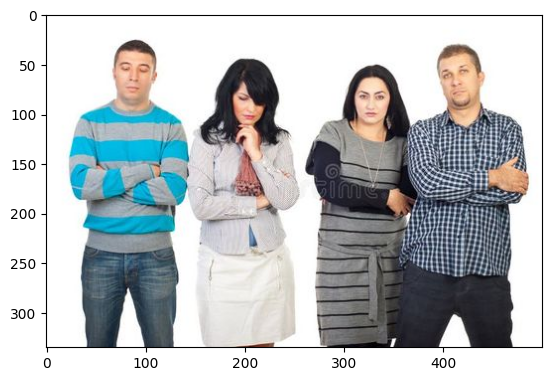

In [8]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img_sad[101],cv2.COLOR_BGR2RGB))

In [9]:
data1=tf.keras.utils.image_dataset_from_directory(data)

Found 387 files belonging to 2 classes.


In [10]:
data1.class_names

['happy', 'sad']

In [11]:
data_iterator=data1.as_numpy_iterator()

In [12]:
batch=data_iterator.next()

In [13]:
batch

(array([[[[202.      , 203.      , 198.      ],
          [202.      , 203.      , 198.      ],
          [202.      , 203.      , 198.      ],
          ...,
          [206.      , 207.      , 202.      ],
          [203.      , 204.      , 199.      ],
          [203.      , 204.      , 199.      ]],
 
         [[202.      , 203.      , 198.      ],
          [202.      , 203.      , 198.      ],
          [202.      , 203.      , 198.      ],
          ...,
          [205.30273 , 206.30273 , 201.30273 ],
          [203.      , 204.      , 199.      ],
          [203.      , 204.      , 199.      ]],
 
         [[202.      , 203.      , 198.      ],
          [202.      , 203.      , 198.      ],
          [202.      , 203.      , 198.      ],
          ...,
          [205.      , 206.      , 201.      ],
          [203.      , 204.      , 199.      ],
          [203.      , 204.      , 199.      ]],
 
         ...,
 
         [[138.32422 , 137.32422 , 142.32422 ],
          [139.231

In [14]:
batch[1]

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

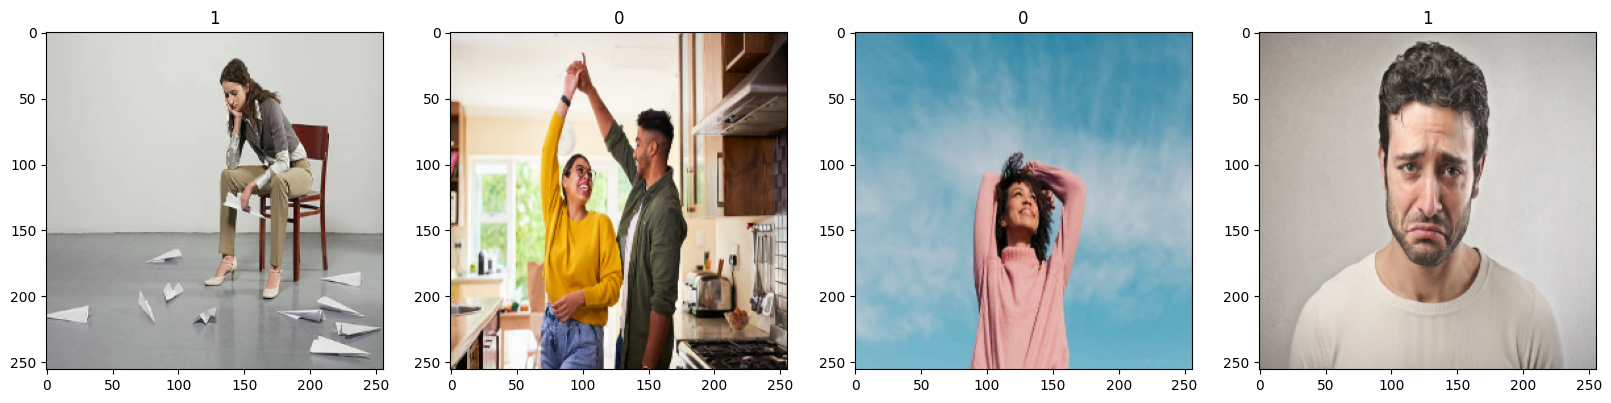

In [15]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocess the image

In [16]:
data = data1.map(lambda x,y:(x/255,y))

In [17]:
scaled_iterator=data.as_numpy_iterator()

In [18]:
batch=scaled_iterator.next()

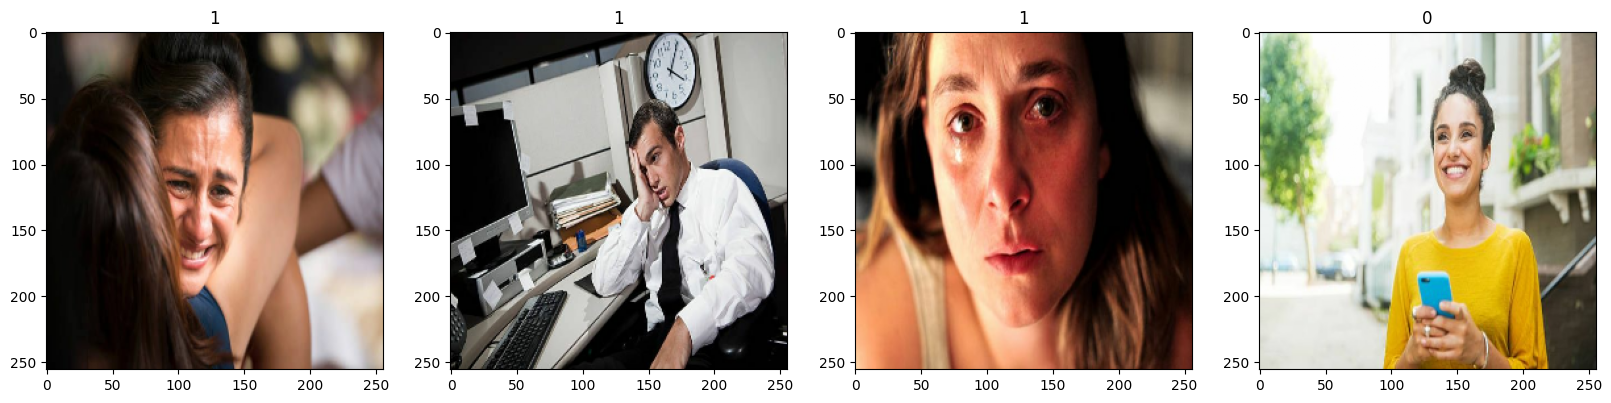

In [19]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Training And Testing the data

In [22]:
len(data)

13

In [23]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1


In [24]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [25]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Deep Neural Network

In [26]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [27]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization


In [86]:

model=Sequential()
model.add(Conv2D(16, (3, 3), activation="relu", kernel_regularizer=l2(0.01), input_shape=(256, 256, 3)))
# Batch Normalization added
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), activation="relu", kernel_regularizer=l2(0.01)))
  # Batch Normalization added
model.add(MaxPooling2D())
model.add(Dropout(0.25)) # Dropout after second conv block

model.add(Conv2D(16, (3, 3), activation="relu", kernel_regularizer=l2(0.01)))
  # Batch Normalization added
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))  # Dropout before final output

model.add(Dense(1, activation="sigmoid"))


c:\Users\HP\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.compile(optimizer="adam",loss=tf.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [88]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,848,545 (7.05 MB)

 Trainable params: 1,848,545 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
logdir="logs"


In [90]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [91]:
hist=model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.4616 - loss: 1.9016 - val_accuracy: 0.5312 - val_loss: 1.0383
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - accuracy: 0.5338 - loss: 1.1010 - val_accuracy: 0.4062 - val_loss: 1.0233
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 295ms/step - accuracy: 0.5774 - loss: 1.0046 - val_accuracy: 0.6562 - val_loss: 0.9769
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - accuracy: 0.5524 - loss: 0.9727 - val_accuracy: 0.5938 - val_loss: 0.9703
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.6794 - loss: 0.9373 - val_accuracy: 0.5469 - val_loss: 0.9442
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - accuracy: 0.7036 - loss: 0.8770 - val_accuracy: 0.4375 - val_loss: 0.9944
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.6466 - loss: 0.8665 - val_accuracy: 0.5156 - val_loss: 0.9028
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.6278 - loss: 0.8583 - val_accuracy: 0.4844 - val_loss:

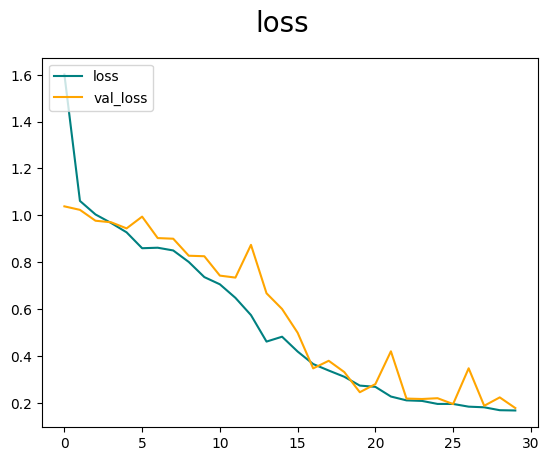

In [92]:
fig=plt.figure()
plt.plot(hist.history["loss"],color="teal",label="loss")
plt.plot(hist.history["val_loss"],color="orange",label="val_loss")
fig.suptitle("loss",fontsize=20)
plt.legend(loc="upper left")
plt.show()


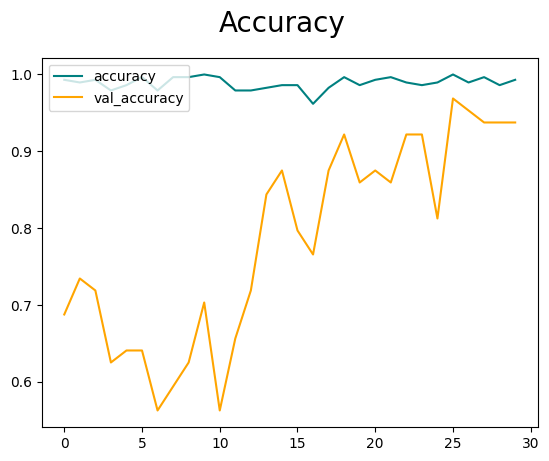

In [52]:
fig=plt.figure()
plt.plot(hist.history["accuracy"],color="teal",label="accuracy")
plt.plot(hist.history["val_accuracy"],color="orange",label="val_accuracy")
fig.suptitle("Accuracy",fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [93]:
print(hist.history)

{'accuracy': [0.5069444179534912, 0.5590277910232544, 0.5486111044883728, 0.5868055820465088, 0.6736111044883728, 0.7152777910232544, 0.6631944179534912, 0.6423611044883728, 0.7395833134651184, 0.7361111044883728, 0.7847222089767456, 0.7951388955116272, 0.8576388955116272, 0.8993055820465088, 0.8819444179534912, 0.9409722089767456, 0.9201388955116272, 0.9340277910232544, 0.9479166865348816, 0.9861111044883728, 0.96875, 0.9826388955116272, 0.9861111044883728, 0.9930555820465088, 0.9930555820465088, 0.9965277910232544, 1.0, 0.9965277910232544, 1.0, 1.0], 'loss': [1.6013087034225464, 1.0614817142486572, 1.0036855936050415, 0.9674411416053772, 0.9273464679718018, 0.8594933748245239, 0.8616484999656677, 0.8499727249145508, 0.800808310508728, 0.7362293601036072, 0.7054113745689392, 0.6476109027862549, 0.573939859867096, 0.46090397238731384, 0.4816763699054718, 0.4184298515319824, 0.3650324046611786, 0.33732590079307556, 0.3107462525367737, 0.2729684114456177, 0.2676643133163452, 0.2262626290

In [94]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [95]:
len(test)

2

In [96]:
for x, y in test.as_numpy_iterator():  # Get one batch
    yhat = model.predict(x)  # Predict
    pre.update_state(y, yhat)  # Precision metric
    re.update_state(y, yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [102]:
for x, y in test.as_numpy_iterator():
    yhat = model.predict(x)
    
    # Convert probabilities to binary predictions
    preds = (yhat > 0.5).astype(int)

    # Print predictions vs actuals
    print("Predicted:", preds.flatten())
    print("Actual:   ", y.flatten())

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted: [1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1]
Actual:    [1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted: [1 1 0]
Actual:    [1 1 0]


Test

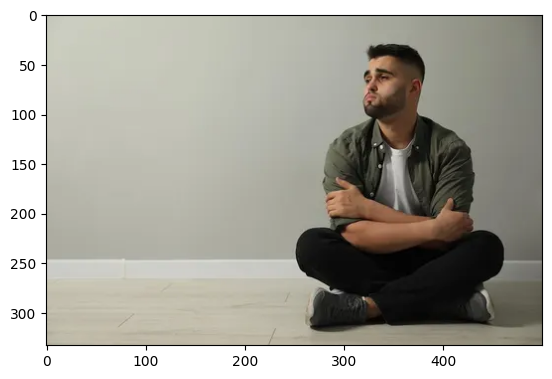

In [136]:
img=cv2.imread("sad-man-sitting-floor-near-light-grey-wall-space-text_495423-69791.webp")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [137]:
resize=tf.image.resize(img,(256,256))


In [138]:
resize.shape

TensorShape([256, 256, 3])

In [139]:
import numpy as np
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [140]:
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.9879559]], dtype=float32)